In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
# Устанавливаем seed для повторяемости результатов
numpy.random.seed(42)

# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

# Создаем последовательную модель
model = Sequential()

#Добавляем уровни сети
model.add(Dense(2048, input_dim=784, activation="relu", kernel_initializer="normal"))
# Добавляем второй слой
model.add(Dense(1024, activation="relu", kernel_initializer="normal"))
# Добавляем третий слой
model.add(Dense(512, activation="relu", kernel_initializer="normal"))

model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

# Обучаем сеть
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=2)

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

# Генерируем описание модели в формате json
model_json = model.to_json()
# Записываем модель в файл
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()

model.save_weights("mnist_model.weights.h5")

print ("Сохранили Model")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2048)           │     1,607,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,786 (16.16 MB)

 Trainable params: 4,235,786 (16.16 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1500/1500 - 12s - 8ms/step - accuracy: 0.8934 - loss: 0.3843 - val_accuracy: 0.9414 - val_loss: 0.2054
Epoch 2/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9486 - loss: 0.1820 - val_accuracy: 0.9567 - val_loss: 0.1586
Epoch 3/10
1500/1500 - 11s - 8ms/step - accuracy: 0.9615 - loss: 0.1330 - val_accuracy: 0.9617 - val_loss: 0.1370
Epoch 4/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9709 - loss: 0.1034 - val_accuracy: 0.9668 - val_loss: 0.1176
Epoch 5/10
1500/1500 - 11s - 8ms/step - accuracy: 0.9771 - loss: 0.0830 - val_accuracy: 0.9680 - val_loss: 0.1120
Epoch 6/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9820 - loss: 0.0673 - val_accuracy: 0.9715 - val_loss: 0.1018
Epoch 7/10
1500/1500 - 13s - 8ms/step - accuracy: 0.9865 - loss: 0.0552 - val_accuracy: 0.9724 - val_loss: 0.0980
Epoch 8/10
1500/1500 - 13s - 8ms/step - accuracy: 0.9892 - loss: 0.0453 - val_accuracy: 0.9727 - val_loss: 0.0948
Epoch 9/10
1500/1500 - 13s - 9ms/step - accuracy: 0.9909 - loss: 0.0375 - val_accur

In [7]:
model.save('./models/base.keras')
model = load_model('./models/base.keras')

In [10]:
import json
json_string = model.to_json()
model.save_weights('mnist_model.weights.h5')


with open("capitals.json", "w") as my_file:
    my_file.write(json_string)

In [12]:
from keras.models import model_from_json
json_filename = "capitals.json"
with open(json_filename, "r") as json_file:
    loaded_model_json = json_file.read()

# Создаем модель на основе загруженных данных
model = model_from_json(loaded_model_json)

# Загружаем веса в модель
h5_filename = "mnist_model.weights.h5"
model.load_weights(h5_filename)

# Перед использованием загруженной нейронной сети необходимо её скомпилировать
model.compile(loss="categorical_crossentropy", optimizer="SGD", 
              metrics=["accuracy"])

# Вывести начальные характеристики нейросети
print(model.summary())

#%%
# Данные для тестирования загруженной нейронной сети
_, (x_test, y_test) = mnist.load_data()
X_test = x_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = to_categorical(y_test, 10)

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных : %.2f%%" % (scores[1] * 100))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2048)           │     1,607,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,786 (16.16 MB)

 Trainable params: 4,235,786 (16.16 MB)

 Non-trainable params: 0 (0.00 B)

None
Точность работы на тестовых данных : 97.49%


In [13]:
model.save('./models/base.keras')
model = load_model('./models/base.keras')

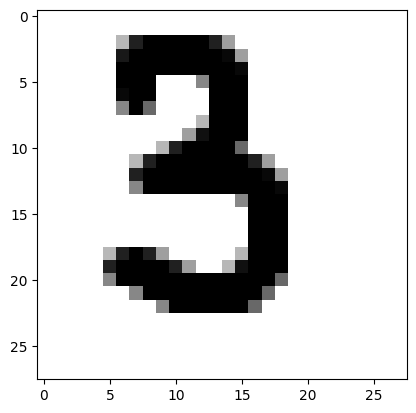

In [35]:
img = plt.imread("./3.png")
img = img[:, :, 1]
plt.imshow(img, cmap='gray')

In [36]:
img = numpy.array(img.reshape(1, 784))
result = model.predict(img)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.47502346e-02 1.40680345e-02 5.71089208e-01 1.02526255e-01
  8.71312386e-06 2.84787677e-02 1.15535033e-06 1.31996587e-01
  1.27057806e-01 2.33028823e-05]]


In [37]:
max_percent = numpy.argmax(result)
for i, perc in enumerate(numpy.round(100 * result)[0]):
    print("%d: %d%%" % (i, perc))
print("result = %d" % max_percent)

0: 2%
1: 1%
2: 57%
3: 10%
4: 0%
5: 3%
6: 0%
7: 13%
8: 13%
9: 0%
result = 2
